In [1]:
%matplotlib inline
import radical.analytics as ra
import radical.pilot as rp
import radical.utils as ru
import radical.entk as re
import more_itertools as mit
from glob import glob
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import csv
import pandas as pd
import json
from scipy.optimize import curve_fit
from scipy import stats
from pprint import pprint
from sklearn.metrics import r2_score
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
!radical-stack


  python               : 2.7.16
  pythonpath           : 
  virtualenv           : radical.analytics

  radical.analytics    : v0.50.0-10-g76b5950@devel
  radical.entk         : 0.7.8
  radical.pilot        : 0.50.16
  radical.utils        : 0.50.2
  saga                 : 0.50.0



In [2]:
Design3 = pd.read_csv('../Data/des3_timestamps.csv')
Design3.drop('Unnamed: 0',axis=1,inplace=True)
len(Design3)

6194

In [3]:
def utilization(timestamps,util='cpu'):
    
    tile_ids = ['Tile1','Tile2','Tile3','Tile4','Tile5','Tile6','Tile7','Tile8','Tile9','Tile10','Tile11','Tile12']
    pred_ids = ['Pred1','Pred2','Pred3','Pred4','Pred5','Pred6','Pred7','Pred8']
    cpu_times = list()
    gpu_times = list()
    cpu_counts = 0
    gpu_counts = 0
    for index,row in timestamps.iterrows():
        if (row['Type'] in tile_ids) and util =='cpu':
            cpu_counts += 1
            cpu_times.append(row['Start'])
            cpu_times.append(row['End'])
        if (row['Type'] in pred_ids) and util =='gpu':
            gpu_counts += 1
            gpu_times.append(row['Start'])
            gpu_times.append(row['End'])
    
    cpu_times.sort()
    gpu_times.sort()
    print 'Times sorted', cpu_counts, len(cpu_times)
    print gpu_counts
    cpu_util = list()
    if util == 'cpu':
        for t in cpu_times:
            cnt = 0
            for index,row in timestamps.iterrows():
                if row['Type'] in tile_ids:
                    if t >= row['Start'] and t <= row['End']:
                        cnt += 1

            cpu_util.append([t, cnt])
        print 'Cpu ready'
        return cpu_util
    
    if util == 'gpu':
        gpu_util = list()
        for t in gpu_times:
            cnt = 0
            for index,row in timestamps.iterrows():
                if row['Type'] in pred_ids:
                    if t >= row['Start'] and t <= row['End']:
                        cnt += 1

            gpu_util.append([t, cnt])
        return gpu_util
        
    return None

In [4]:
Des3CpuUtil = utilization(Design3,util='cpu')
Des3GpuUtil = utilization(Design3,util='gpu')

Times sorted 3097 6194
0
Cpu ready
Times sorted 0 0
3097


In [5]:
Design1CpuUtil = np.load('../Data/Design1CPUutil.npy')
Design1GpuUtil = np.load('../Data/Design1GPUutil.npy')

In [6]:
Des3GpuUtil = np.array(Des3GpuUtil)
Des3CpuUtil = np.array(Des3CpuUtil)

In [12]:
np.save('../Data/Des3CpuUtil',Des3CpuUtil)
np.save('../Data/Des3GpuUtil',Des3GpuUtil)

In [8]:
Design1GpuUtil[-1,1]

1.0

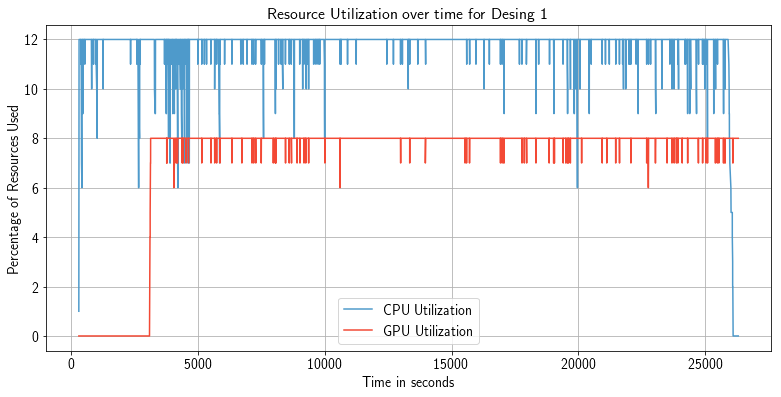

In [9]:
t = 8500
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(13,6),sharex=True)
_ = axis.plot(Design1CpuUtil[:t,0],(((Design1CpuUtil[:t,1]-Design1GpuUtil[:t,1])/10)/1)*1,marker='',linestyle='-', label='CPU Utilization', color=blues(150))
_ = axis.plot(Design1GpuUtil[:t,0],(Design1GpuUtil[:t,1]/1)*1,marker='',linestyle='-', label='GPU Utilization', color=reds(150))
_ = axis.set_ylabel('Percentage of Resources Used',fontsize=14)
_ = axis.set_xlabel('Time in seconds',fontsize=14)
_ = axis.grid('on')
_ = axis.legend(fontsize=14)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=14)
_ = axis.set_yticklabels(axis.get_yticks().astype('int').tolist(),fontsize=14)
_ = axis.set_title('Resource Utilization over time for Desing 1', fontsize=16)
# fig.savefig('Design1Utilization.pdf',dpi=800,bbox_inches='tight')

In [10]:
Des3CpuUtil = Des3CpuUtil
for tick in Des3GpuUtil[Des3GpuUtil[:,0] > Des3CpuUtil[:,0].max()][:,0]:
    Des3CpuUtil = np.vstack((Des3CpuUtil,[tick,0]))
    

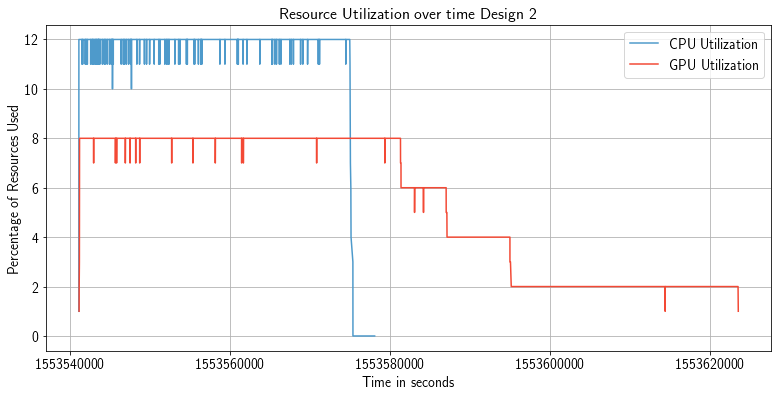

In [11]:
t= 6500
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(13,6),sharex=True)
_ = axis.plot(Des3CpuUtil[:t,0],(Des3CpuUtil[:t,1]/1)*1,marker='',linestyle='-', label='CPU Utilization', color=blues(150))
_ = axis.plot(Des3GpuUtil[:t,0],(Des3GpuUtil[:t,1]/1)*1,marker='',linestyle='-', label='GPU Utilization', color=reds(150))
_ = axis.set_ylabel('Percentage of Resources Used',fontsize=14)
_ = axis.set_xlabel('Time in seconds',fontsize=14)
_ = axis.grid('on')
_ = axis.legend(fontsize=14)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=14)
_ = axis.set_yticklabels(axis.get_yticks().astype('int').tolist(),fontsize=14)
_ = axis.set_title('Resource Utilization over time Design 2', fontsize=16)
#fig.savefig('Design2Utilization.pdf',dpi=800,bbox_inches='tight')